In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/datasets/Kannada MNIST/train.csv')
print(train.shape)
train.head()

(60000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/datasets/Kannada MNIST/Dig-MNIST.csv')
print(test.shape)
test.head()

(10240, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
concat = [train, test]

final_data = pd.concat(concat)
print(final_data.shape)
final_data.head()

(70240, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = np.array(final_data.iloc[:, 1:])
Y = np.array(final_data.iloc[:, 0])

X.shape, Y.shape

((70240, 784), (70240,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=10)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(63216, 784) (7024, 784) (63216,) (7024,)


In [7]:
from tensorflow.keras.utils import to_categorical

Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(63216, 28, 28, 1) (7024, 28, 28, 1) (63216, 10) (7024, 10)


In [20]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [21]:
model = Sequential()
model.add(Input((28, 28, 1)))

model.add(Conv2D(8, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(16,(3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(32,(3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, Y_train_req, epochs=20, validation_split=0.1)

Train on 56894 samples, validate on 6322 samples
Epoch 1/20
56894/56894 [==============================] - 9s 160us/sample - loss: 0.4290 - accuracy: 0.9150 - val_loss: 0.1636 - val_accuracy: 0.9669
Epoch 2/20
56894/56894 [==============================] - 8s 146us/sample - loss: 0.1448 - accuracy: 0.9700 - val_loss: 0.1215 - val_accuracy: 0.9756
Epoch 3/20
56894/56894 [==============================] - 9s 151us/sample - loss: 0.1062 - accuracy: 0.9773 - val_loss: 0.0897 - val_accuracy: 0.9812
Epoch 4/20
56894/56894 [==============================] - 9s 154us/sample - loss: 0.0849 - accuracy: 0.9796 - val_loss: 0.0830 - val_accuracy: 0.9812
Epoch 5/20
56894/56894 [==============================] - 9s 158us/sample - loss: 0.0720 - accuracy: 0.9827 - val_loss: 0.0783 - val_accuracy: 0.9829
Epoch 6/20
56894/56894 [==============================] - 9s 162us/sample - loss: 0.0618 - accuracy: 0.9840 - val_loss: 0.0906 - val_accuracy: 0.9831
Epoch 7/20
56894/56894 [===========================

In [25]:
import matplotlib.pyplot as plt

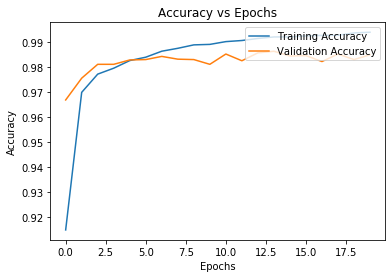

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

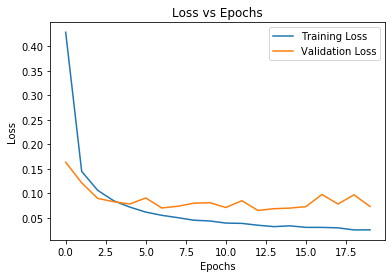

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [28]:
model.evaluate(X_test, Y_test_req)

7024/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05359842512726885, 0.9870444]

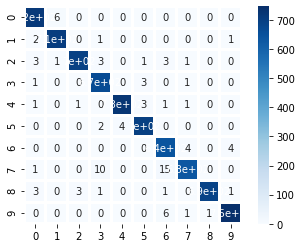

[[717   6   0   0   0   0   0   0   0   0]
 [  2 707   0   1   0   0   0   0   0   1]
 [  3   1 698   3   0   1   3   1   0   0]
 [  1   0   0 669   0   3   0   1   0   0]
 [  1   0   1   0 726   3   1   1   0   0]
 [  0   0   0   2   4 700   0   0   0   0]
 [  0   0   0   0   0   0 643   4   0   4]
 [  1   0   0  10   0   0  15 634   0   0]
 [  3   0   3   1   0   0   1   0 693   1]
 [  0   0   0   0   0   0   6   1   1 746]]


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_test = X_test.astype('float32')
prediction = model.predict_classes(X_test)

cm = confusion_matrix(Y_test, prediction)
heatmap = sns.heatmap(cm, annot=True, square=True, cmap='Blues', linewidths=2)
plt.show(heatmap)
print(cm)

In [35]:
test_X = np.array(test.iloc[:, 1:])
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
print(test_X.shape)

test_Y = np.array(test.iloc[:, 0])
test_Y_req = to_categorical(test_Y)

(10240, 28, 28, 1)


In [36]:
model.evaluate(test_X, test_Y_req)

10240/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06729596466902876, 0.9825195]

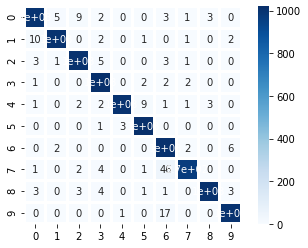

[[1001    5    9    2    0    0    3    1    3    0]
 [  10 1008    0    2    0    1    0    1    0    2]
 [   3    1 1011    5    0    0    3    1    0    0]
 [   1    0    0 1017    0    2    2    2    0    0]
 [   1    0    2    2 1005    9    1    1    3    0]
 [   0    0    0    1    3 1020    0    0    0    0]
 [   0    2    0    0    0    0 1014    2    0    6]
 [   1    0    2    4    0    1   46  970    0    0]
 [   3    0    3    4    0    1    1    0 1009    3]
 [   0    0    0    0    1    0   17    0    0 1006]]


In [37]:
test_X = test_X.astype('float32')
predictions = model.predict_classes(test_X)

cm = confusion_matrix(test_Y, predictions)
heatmap = sns.heatmap(cm, annot=True, square=True, cmap='Blues', linewidths=2)
plt.show(heatmap)
print(cm)